In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
import warnings

tf.random.set_seed(2)
np.random.seed(42)
random.seed(42)
os.environ["PYTHONHASHSEED"] = str(42)

physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/user/Desktop/Workspace/MachineLearning/Datasets/open/'

In [23]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

# 기초 EDA 및 전처리 과정 설계

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [5]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


## 범주형

In [6]:
train['대출기간'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [7]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


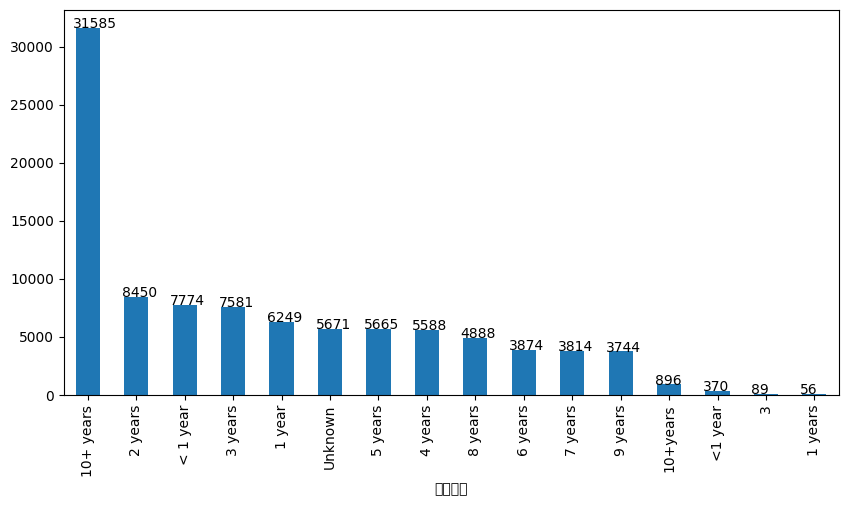

In [8]:
plt.figure(figsize = (10, 5))
target = train['근로기간'].value_counts()
target.plot(kind = 'bar')
for i in range(16):
    plt.text(x = i - 0.30 , y = target[i], s = target[i])

plt.show()

In [9]:
train['근로기간'].replace('< 1 year', '1- year', inplace = True)
train['근로기간'].replace('<1 year', '1- year', inplace = True)
train['근로기간'].replace('1 year', '1 years', inplace = True)
train['근로기간'].replace('3', '3 years', inplace = True)
train['근로기간'].replace('10+years', '10+ years', inplace = True)

In [10]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 years', '3 years', '7 years', '4 years', '1- year'],
      dtype=object)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


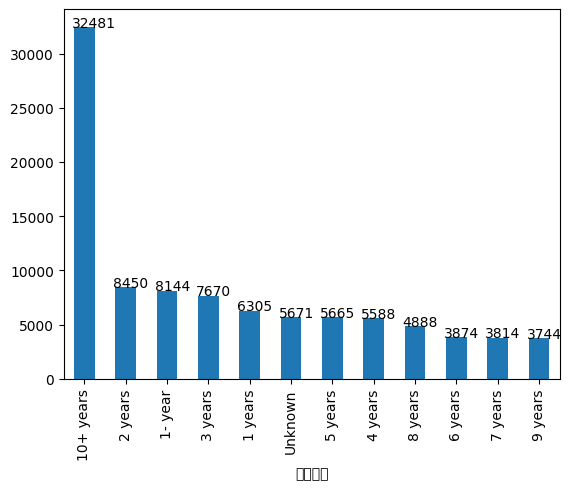

In [11]:
target = train['근로기간'].value_counts()
target.plot(kind = 'bar')
for i in range(12):
    plt.text(x = i - 0.30 , y = target[i], s = target[i])

plt.show()

In [12]:
train['주택소유상태'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missi

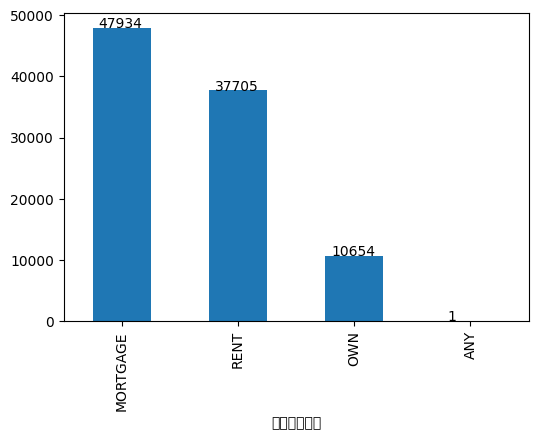

In [13]:
plt.figure(figsize = (6, 4))
target = train['주택소유상태'].value_counts()
target.plot(kind = 'bar')
for i in range(4):
    plt.text(x = i - 0.2, y = target[i], s = target[i])

plt.show()

In [14]:
train[train['주택소유상태'] == 'ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10+ years,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [15]:
train['대출목적'].unique()

array(['부채 통합', '주택 개선', '주요 구매', '휴가', '의료', '자동차', '신용 카드', '소규모 사업',
       '기타', '이사', '주택', '재생 에너지'], dtype=object)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) miss

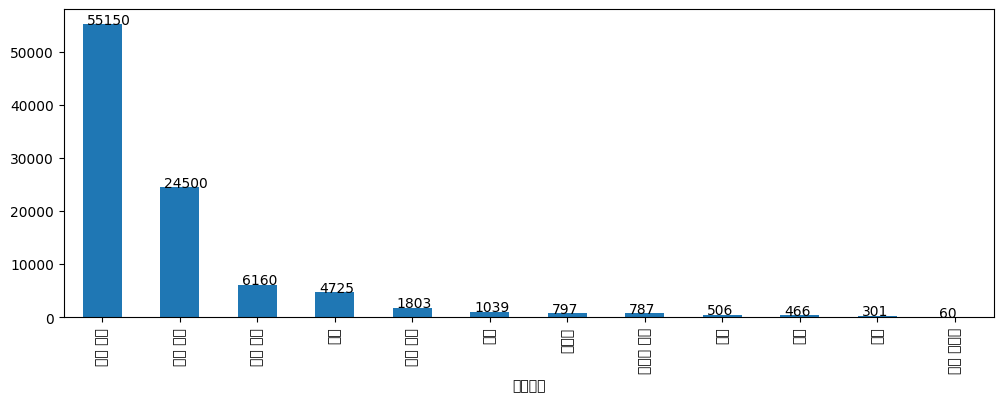

In [16]:
plt.figure(figsize = (12, 4))
target = train['대출목적'].value_counts()
target.plot(kind = 'bar')
for i in range(12):
    plt.text(x = i - 0.2, y = target[i], s = target[i])

plt.show()

## 수치형

In [17]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


<Axes: >

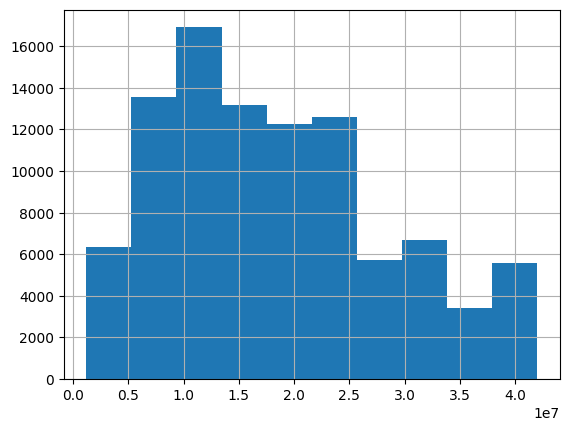

In [18]:
train['대출금액'].hist()

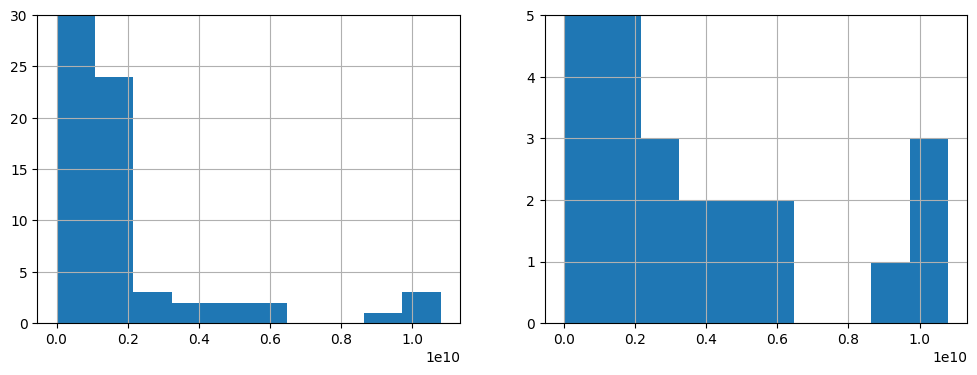

In [19]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
train['연간소득'].hist()
plt.ylim([0, 30])

plt.subplot(1, 2, 2)
train['연간소득'].hist()
plt.ylim([0, 5])

plt.show()

In [20]:
train[train['연간소득'] > 0.8*10**10]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12448,TRAIN_12448,12000000,36 months,3 years,MORTGAGE,9120000000,0.09,27,주택 개선,10,12000000,192312.0,0.0,0.0,A
38340,TRAIN_38340,14400000,36 months,10+ years,MORTGAGE,10200025200,0.22,21,신용 카드,0,349020,99036.0,0.0,0.0,B
60715,TRAIN_60715,13200000,36 months,10+ years,MORTGAGE,10800000000,0.08,29,부채 통합,0,331128,70740.0,0.0,0.0,A
86424,TRAIN_86424,16800000,60 months,10+ years,MORTGAGE,10440000000,0.18,32,부채 통합,0,213312,129096.0,0.0,0.0,B


C:\Users\user\AppData\Local\Temp\ipykernel_12292\3603584573.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\3603584573.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\3

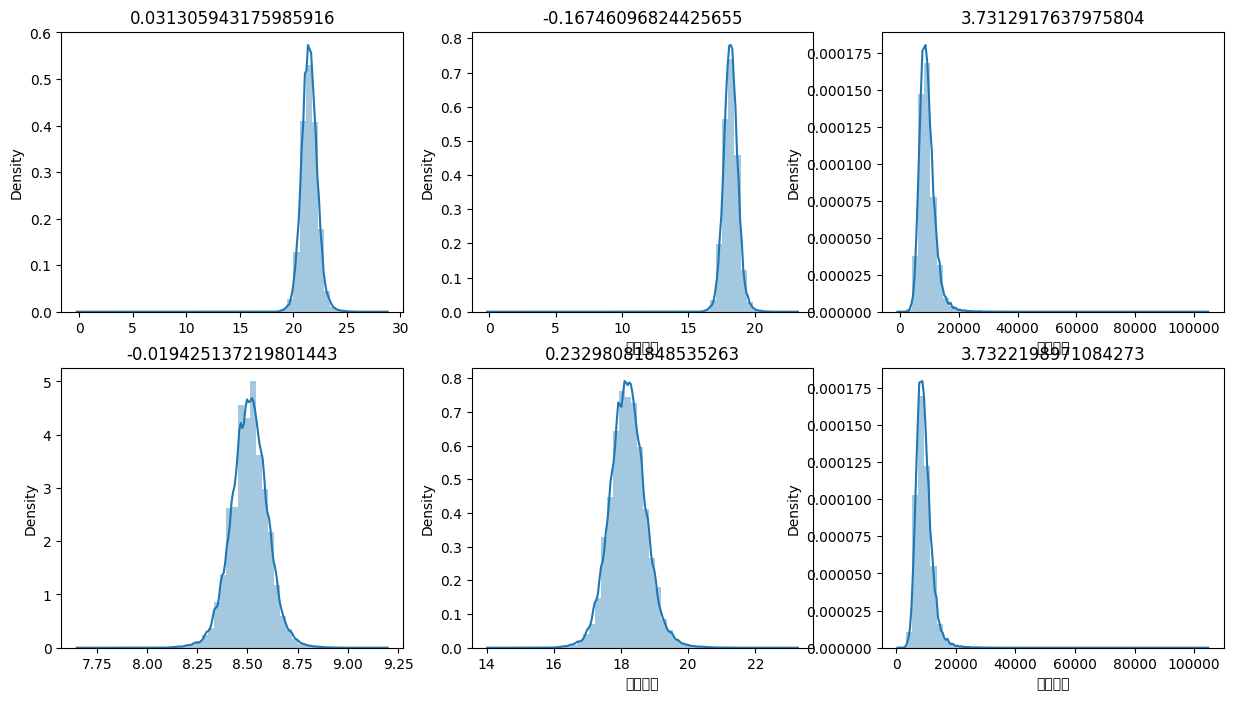

In [21]:
from scipy.stats import boxcox
import seaborn as sns

x_1 = boxcox(train['연간소득'] + 1)[0]
y_1 = np.log(train['연간소득'] + 1)
z_1 = np.sqrt(train['연간소득'] + 1)
no_bias = train['연간소득'].drop(12498)
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 8))
check = [x_1, y_1, z_1]
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(2, 3, i + 4)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

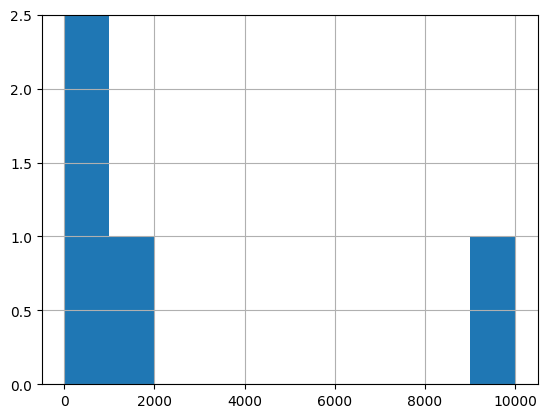

In [22]:
train['부채_대비_소득_비율'].hist()
plt.ylim([0, 2.5])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12292\173243535.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\173243535.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\173

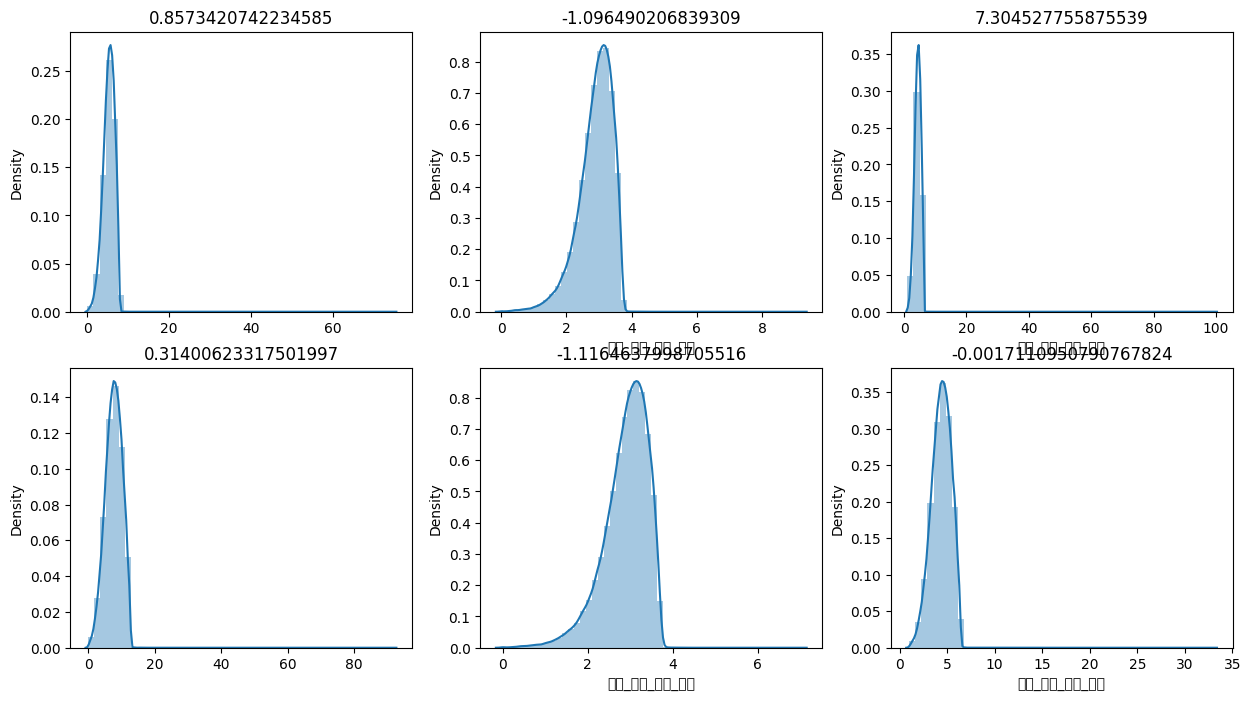

In [23]:
x_1 = boxcox(train['부채_대비_소득_비율'] + 1)[0]
y_1 = np.log(train['부채_대비_소득_비율'] + 1)
z_1 = np.sqrt(train['부채_대비_소득_비율'] + 1)
no_bias = train['부채_대비_소득_비율'].drop(12498)
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 8))
check = [x_1, y_1, z_1]
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(2, 3, i + 4)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

(0.0, 15.0)

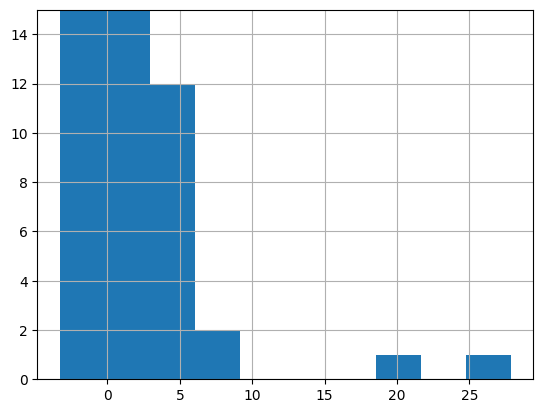

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(np.array(z_2).reshape(-1, 1))
pd.Series({'target' : x}).hist()
plt.ylim([0, 15])

In [25]:
pd.Series(x.reshape(-1,)).describe()

count    9.629300e+04
mean     1.616731e-16
std      1.000005e+00
min     -3.285487e+00
25%     -6.689798e-01
50%      5.771498e-02
75%      7.459043e-01
max      2.785365e+01
dtype: float64

In [26]:
values = pd.Series(x.reshape(-1,)).describe()
Q3 = values['75%']
Q1 = values['25%']
IQR = Q3 - Q1
OUT_MAX = Q3 + 1.5 * IQR
OUT_MIN = Q1 - 1.5 * IQR

In [27]:
np.sort(x[x > OUT_MAX])

array([ 2.95721134,  2.96831289,  2.97287916,  3.01643988,  3.23610775,
        3.2768953 ,  3.40226412,  3.55041187,  3.63151398,  4.00574202,
        4.3226235 ,  5.50648896,  6.45382478,  6.65399449, 20.94371156,
       27.85365013])

In [28]:
# 정규화 후 4.0 이상 데이터를 이상치로 생각, 표시
train.loc[train['부채_대비_소득_비율'].sort_values()[-8:].index]

# 값이 높으면 대출 등급을 D, E로 판단할 수 있으므로 그대로 둔다.

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
94676,TRAIN_94676,20400000,36 months,Unknown,MORTGAGE,19684800,71.40,30,부채 통합,0,933156,432960.0,0.0,0.0,C
50868,TRAIN_50868,12960000,60 months,Unknown,MORTGAGE,9792000,77.06,13,부채 통합,0,127404,201504.0,0.0,0.0,E
83954,TRAIN_83954,24000000,60 months,1- year,RENT,32400000,100.09,16,부채 통합,0,248064,339732.0,0.0,0.0,E
62125,TRAIN_62125,18000000,36 months,Unknown,MORTGAGE,10440000,120.66,26,부채 통합,0,396456,200328.0,0.0,0.0,D
81970,TRAIN_81970,14400000,60 months,Unknown,MORTGAGE,11694000,125.25,53,부채 통합,0,302736,412116.0,0.0,0.0,D
29129,TRAIN_29129,14400000,36 months,Unknown,RENT,1440000,672.52,13,부채 통합,0,595344,442860.0,0.0,0.0,E
62765,TRAIN_62765,7860000,36 months,Unknown,MORTGAGE,2124000,1092.52,25,신용 카드,2,0,0.0,0.0,0.0,D
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.00,20,신용 카드,2,205356,85884.0,0.0,0.0,C


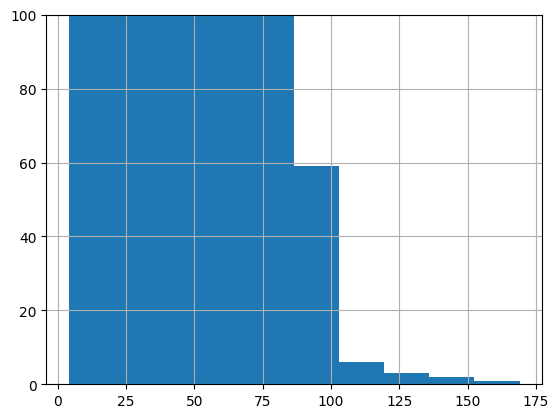

In [29]:
train['총계좌수'].hist()
plt.ylim([0, 100])
plt.show()

In [30]:
train['총계좌수'].sort_values()

59684      4
82543      4
66356      4
37062      4
15981      4
        ... 
39386    127
29684    130
66990    140
68579    151
57818    169
Name: 총계좌수, Length: 96294, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12292\3856810929.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\3856810929.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\3

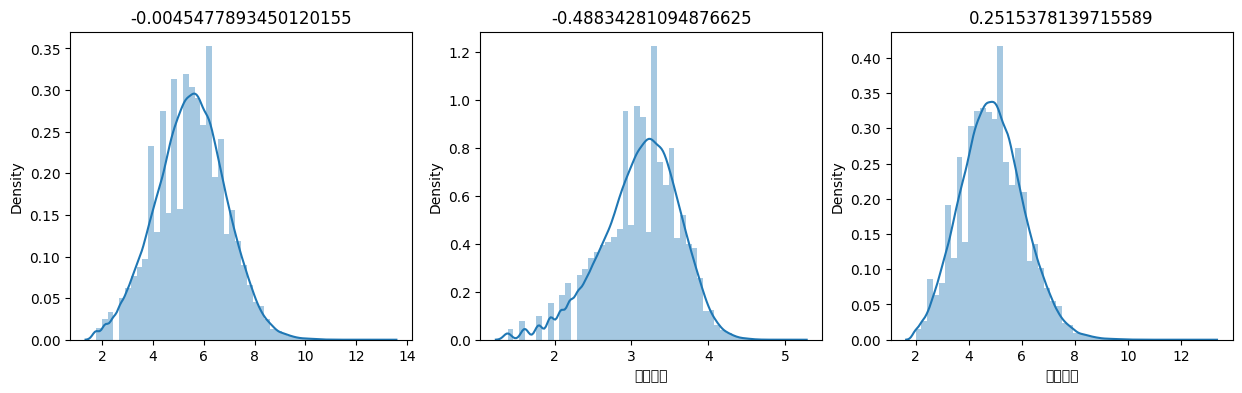

In [31]:
no_bias = train['총계좌수'].drop(12498)
x_2 = boxcox(no_bias)[0]
y_2 = np.log(no_bias)
z_2 = np.sqrt(no_bias)

plt.figure(figsize = (15, 4))
check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

(0.0, 5.0)

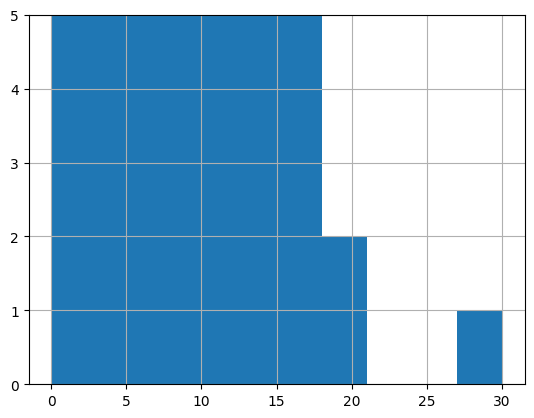

In [32]:
train['최근_2년간_연체_횟수'].hist()
plt.ylim([0, 5])

In [33]:
train.loc[train['최근_2년간_연체_횟수'].argmax()]

ID              TRAIN_57431
대출금액               18000000
대출기간              36 months
근로기간                1- year
주택소유상태                 RENT
연간소득              168000000
부채_대비_소득_비율           10.23
총계좌수                     64
대출목적                     기타
최근_2년간_연체_횟수             30
총상환원금                819192
총상환이자              391788.0
총연체금액                   0.0
연체계좌수                   0.0
대출등급                      C
Name: 57431, dtype: object

C:\Users\user\AppData\Local\Temp\ipykernel_12292\2660441889.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\2660441889.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\2

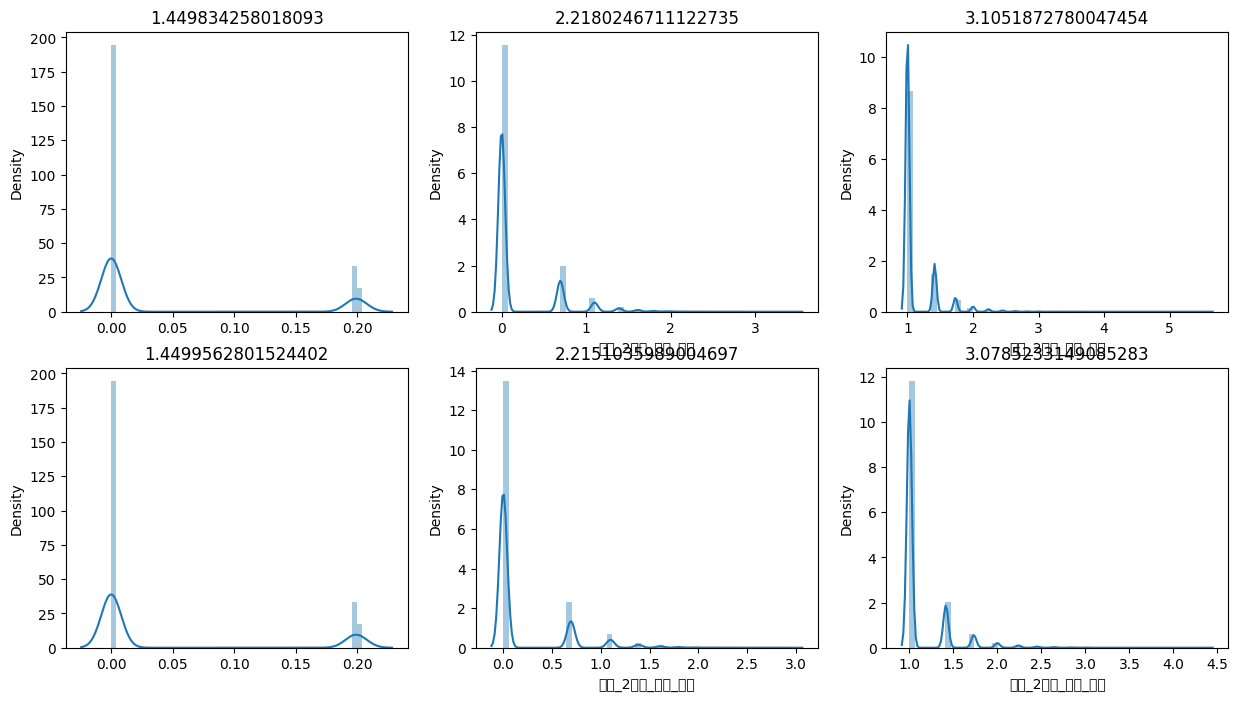

In [34]:
x_1 = boxcox(train['최근_2년간_연체_횟수'] + 1)[0]
y_1 = np.log(train['최근_2년간_연체_횟수'] + 1)
z_1 = np.sqrt(train['최근_2년간_연체_횟수'] + 1)
no_bias = train['최근_2년간_연체_횟수'].drop([12498, 57431])
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 8))
check = [x_1, y_1, z_1]
for i in range(3):
    plt.subplot(2, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(2, 3, i + 4)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

# log, sqrt는 편향성이 약간 사라지긴 함
# 1. 최대한 넓게 퍼진 데이터 사용해보기 (log)
# 2. 다른 특성과 활용하여 새로운 특성 생성하기

(0.0, 300.0)

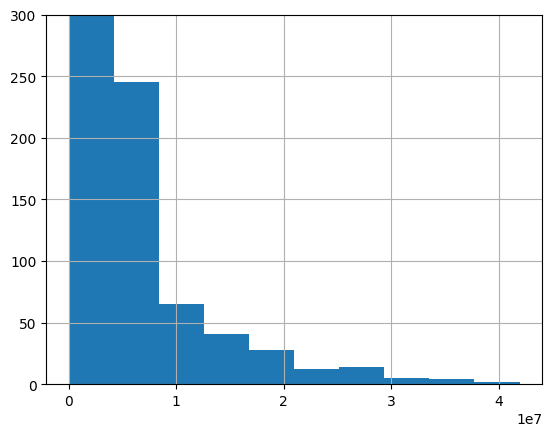

In [35]:
train['총상환원금'].hist()
plt.ylim([0, 300])

C:\Users\user\AppData\Local\Temp\ipykernel_12292\160863494.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\160863494.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\160

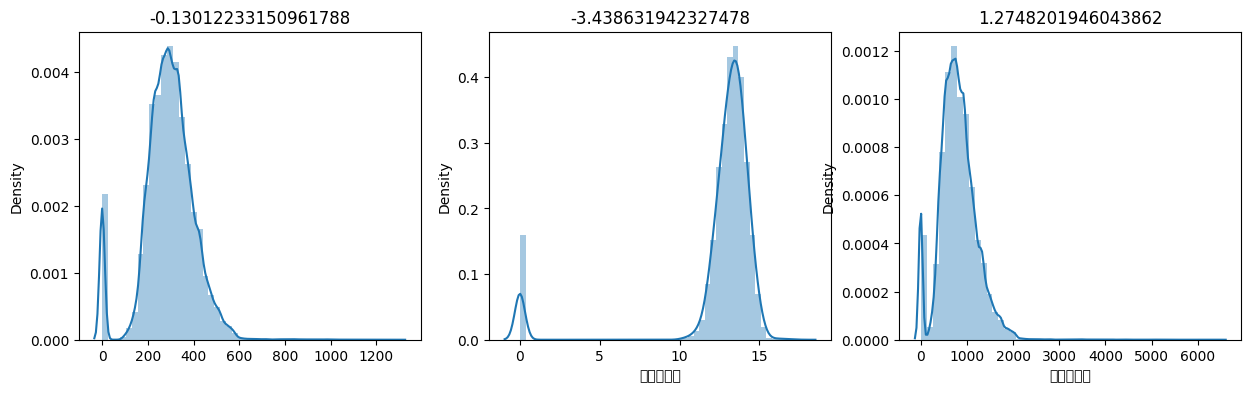

In [36]:
no_bias = train['총상환원금'].drop([12498, 57431])
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 4))

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

In [37]:
y_2[y_2 == 0.]

# 대략 5400개의 0 데이터가 존재함
# BOXCOX
# 0 데이터를 처리해줄 무언가 필요

0        0.0
19       0.0
36       0.0
61       0.0
90       0.0
        ... 
96219    0.0
96224    0.0
96252    0.0
96254    0.0
96275    0.0
Name: 총상환원금, Length: 5412, dtype: float64

In [38]:
train[train['총상환원금'] == 0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
19,TRAIN_00019,15900000,36 months,Unknown,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
36,TRAIN_00036,7800000,36 months,10+ years,MORTGAGE,86400000,23.10,20,기타,0,0,0.0,0.0,0.0,B
61,TRAIN_00061,2400000,36 months,7 years,MORTGAGE,120000000,20.86,32,기타,0,0,0.0,0.0,0.0,B
90,TRAIN_00090,12000000,60 months,9 years,RENT,78000000,19.87,19,부채 통합,0,0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96219,TRAIN_96219,24000000,60 months,1- year,RENT,150000000,34.27,22,부채 통합,0,0,0.0,0.0,0.0,C
96224,TRAIN_96224,30000000,60 months,10+ years,OWN,162000000,14.16,37,부채 통합,0,0,0.0,0.0,0.0,E
96252,TRAIN_96252,2580000,36 months,3 years,OWN,79200000,4.60,24,부채 통합,0,0,0.0,0.0,0.0,B
96254,TRAIN_96254,17940000,60 months,3 years,RENT,52800000,24.26,5,부채 통합,0,0,0.0,0.0,0.0,F


(0.0, 200.0)

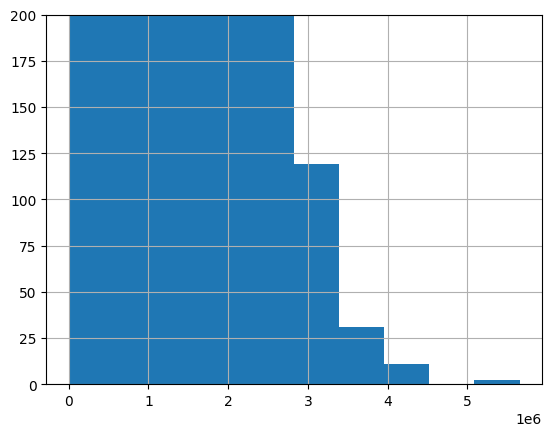

In [39]:
train['총상환이자'].hist()
plt.ylim([0, 200])

C:\Users\user\AppData\Local\Temp\ipykernel_12292\1469707688.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\1469707688.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\1

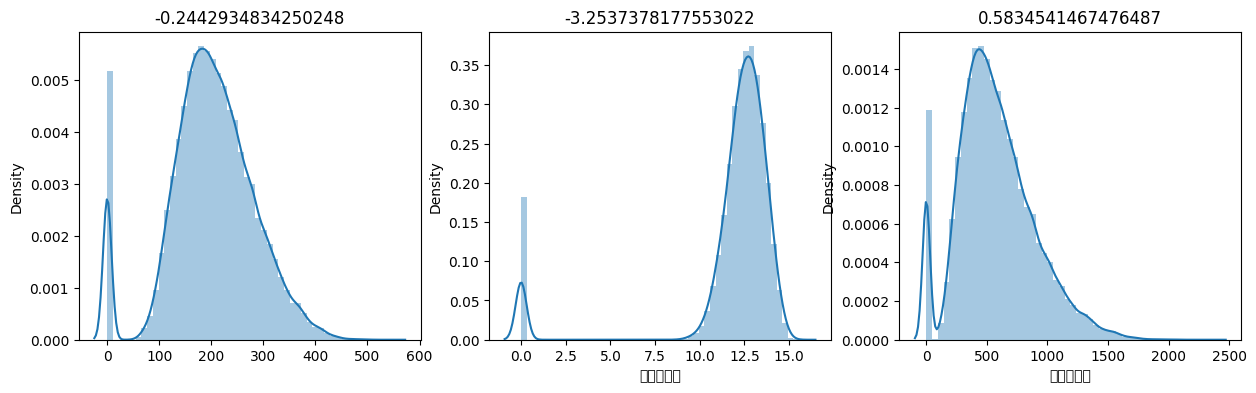

In [40]:
no_bias = train['총상환이자'].drop([12498, 57431])
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 4))

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

In [41]:
train[train['총상환이자'] == 0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
19,TRAIN_00019,15900000,36 months,Unknown,RENT,41858400,18.34,9,신용 카드,0,0,0.0,0.0,0.0,C
36,TRAIN_00036,7800000,36 months,10+ years,MORTGAGE,86400000,23.10,20,기타,0,0,0.0,0.0,0.0,B
61,TRAIN_00061,2400000,36 months,7 years,MORTGAGE,120000000,20.86,32,기타,0,0,0.0,0.0,0.0,B
90,TRAIN_00090,12000000,60 months,9 years,RENT,78000000,19.87,19,부채 통합,0,0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96219,TRAIN_96219,24000000,60 months,1- year,RENT,150000000,34.27,22,부채 통합,0,0,0.0,0.0,0.0,C
96224,TRAIN_96224,30000000,60 months,10+ years,OWN,162000000,14.16,37,부채 통합,0,0,0.0,0.0,0.0,E
96252,TRAIN_96252,2580000,36 months,3 years,OWN,79200000,4.60,24,부채 통합,0,0,0.0,0.0,0.0,B
96254,TRAIN_96254,17940000,60 months,3 years,RENT,52800000,24.26,5,부채 통합,0,0,0.0,0.0,0.0,F


(0.0, 100.0)

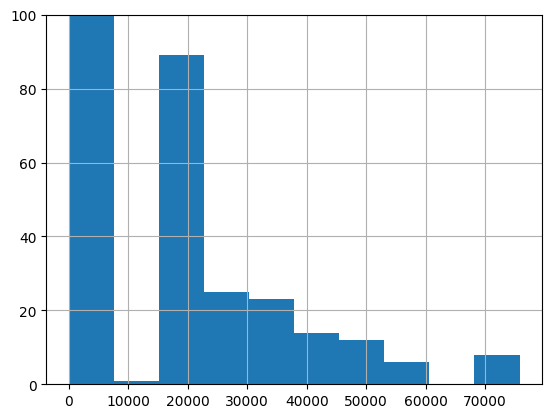

In [42]:
train['총연체금액'].hist()
plt.ylim([0, 100])

C:\Users\user\AppData\Local\Temp\ipykernel_12292\3455696014.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\3455696014.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\3

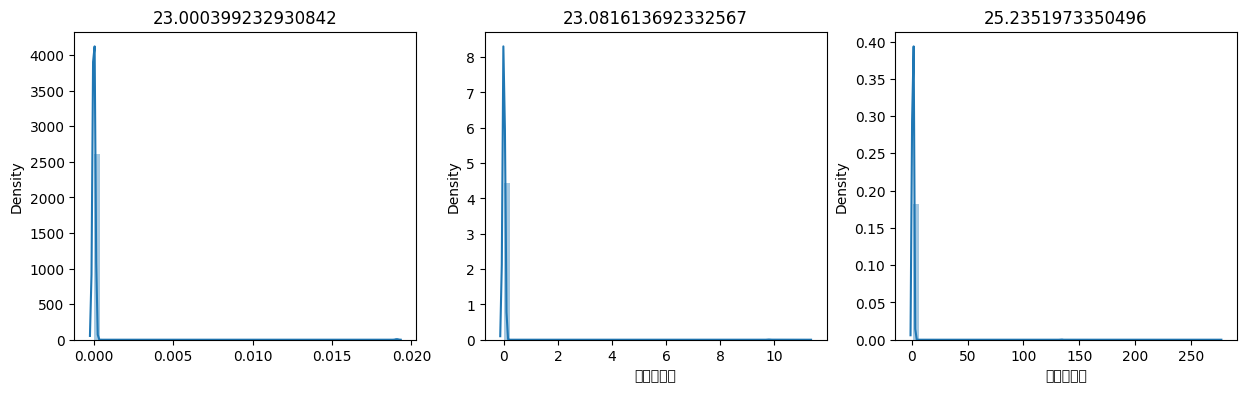

In [43]:
no_bias = train['총연체금액'].drop([12498, 57431])
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 4))

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

In [44]:
train[train['총연체금액'] > 0].sort_values(by = '총연체금액')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
66217,TRAIN_66217,15360000,60 months,6 years,RENT,48000000,21.30,20,부채 통합,0,536484,518736.0,2400.0,0.0,C
18462,TRAIN_18462,7200000,36 months,8 years,RENT,48000000,36.96,25,주요 구매,0,644976,355488.0,4800.0,0.0,D
13590,TRAIN_13590,15000000,60 months,Unknown,RENT,49800000,28.22,26,신용 카드,1,846336,956472.0,6000.0,0.0,D
45646,TRAIN_45646,38400000,60 months,10+ years,MORTGAGE,96000000,25.88,37,부채 통합,1,0,0.0,12000.0,0.0,G
95501,TRAIN_95501,12000000,60 months,2 years,OWN,66960000,30.86,25,이사,0,375348,513312.0,18000.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62119,TRAIN_62119,24420000,60 months,10+ years,RENT,60000000,15.36,6,기타,0,0,1354656.0,72864.0,0.0,G
19586,TRAIN_19586,38280000,36 months,3 years,RENT,91200000,26.74,20,주택 개선,0,791760,2122584.0,74076.0,0.0,F
35250,TRAIN_35250,20400000,60 months,6 years,RENT,86400000,24.17,14,신용 카드,0,1028844,1060428.0,75216.0,0.0,B
87505,TRAIN_87505,42000000,36 months,2 years,MORTGAGE,162000000,6.17,11,부채 통합,1,3987684,3547920.0,75768.0,0.0,D


(0.0, 550.0)

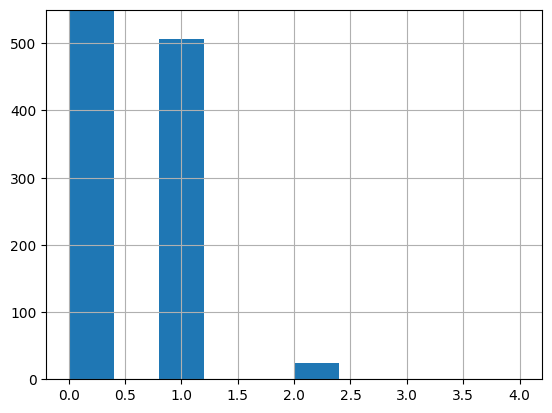

In [45]:
train['연체계좌수'].hist()
plt.ylim([0, 550])

In [46]:
train.loc[57431]

ID              TRAIN_57431
대출금액               18000000
대출기간              36 months
근로기간                1- year
주택소유상태                 RENT
연간소득              168000000
부채_대비_소득_비율           10.23
총계좌수                     64
대출목적                     기타
최근_2년간_연체_횟수             30
총상환원금                819192
총상환이자              391788.0
총연체금액                   0.0
연체계좌수                   0.0
대출등급                      C
Name: 57431, dtype: object

C:\Users\user\AppData\Local\Temp\ipykernel_12292\1039106977.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\1039106977.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(check[i])
C:\Users\user\AppData\Local\Temp\ipykernel_12292\1

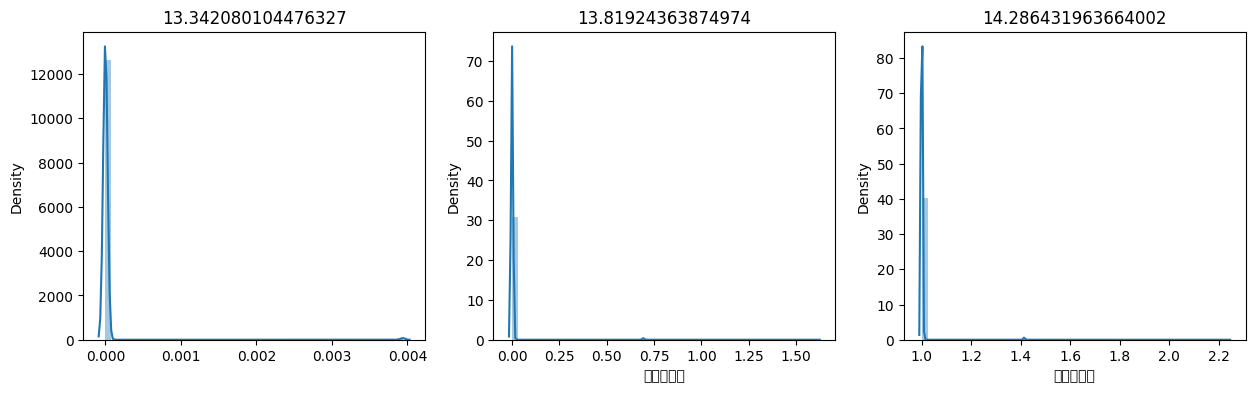

In [47]:
no_bias = train['연체계좌수'].drop([12498, 57431])
x_2 = boxcox(no_bias + 1)[0]
y_2 = np.log(no_bias + 1)
z_2 = np.sqrt(no_bias + 1)

plt.figure(figsize = (15, 4))

check = [x_2, y_2, z_2]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.distplot(check[i])
    if i == 0:
        plt.title(pd.Series(check[i]).skew())
    else:
        plt.title(check[i].skew())

plt.show()

In [48]:
train[train['연체계좌수'] > 0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
11,TRAIN_00011,14400000,60 months,3 years,RENT,66000000,18.50,24,부채 통합,1,170820,131796.0,0.0,1.0,C
146,TRAIN_00146,4800000,36 months,2 years,RENT,64800000,30.67,43,부채 통합,6,103164,58896.0,0.0,1.0,D
372,TRAIN_00372,12000000,36 months,8 years,RENT,90000000,23.98,12,부채 통합,1,564216,219456.0,0.0,1.0,B
529,TRAIN_00529,42000000,36 months,3 years,RENT,111600000,21.41,28,신용 카드,1,3985152,1503408.0,0.0,1.0,B
899,TRAIN_00899,33600000,36 months,10+ years,OWN,216000000,9.55,65,주택 개선,2,2968812,1715652.0,0.0,1.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95547,TRAIN_95547,24000000,36 months,10+ years,MORTGAGE,90000000,15.44,25,부채 통합,5,2120592,1280628.0,0.0,1.0,D
95703,TRAIN_95703,9600000,36 months,2 years,RENT,114000000,22.11,22,부채 통합,1,901236,372996.0,0.0,1.0,C
95775,TRAIN_95775,14400000,60 months,10+ years,RENT,120000000,24.31,53,부채 통합,4,516060,463524.0,0.0,1.0,C
95877,TRAIN_95877,6000000,36 months,10+ years,MORTGAGE,150600000,16.72,19,기타,4,135756,63792.0,0.0,1.0,C


## 파이프라인 설계 및 최종 제출

In [77]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

class Pipeline:
    def __init__(self):
        self.num_scaler = []
        self.num_transformer = {}
        self.cat_encoder = []
        self.is_train = True
        self.ID = None
    
    def check_train(self):
        if '대출등급' in self.dataset:
            self.is_train = True
        else:
            self.is_train = False

    def label_encoding(self):
        if self.is_train == True:
            encoder = LabelEncoder()
            self.dataset['대출등급'] = encoder.fit_transform(self.dataset['대출등급'])

            return encoder
        
    def save_ID(self):
        self.ID = self.dataset['ID']

    def preprocessing(self, dataset):
        self.dataset = dataset
        self.check_train() # self.is_train 값 변경

        if self.is_train == False:
            self.save_ID()
        self.dataset.drop('ID', axis = 1, inplace = True)
        
        num_columns_1 = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'] # StandardScaler
        num_columns_2 = ['연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자'] # BOXCOX
        cat_columns = ['대출기간', '근로기간', '주택소유상태', '대출목적']

        self.dataset['근로기간'].replace('< 1 year', '1- year', inplace = True)
        self.dataset['근로기간'].replace('<1 year', '1- year', inplace = True)
        self.dataset['근로기간'].replace('1 year', '1 years', inplace = True)
        self.dataset['근로기간'].replace('3', '3 years', inplace = True)
        self.dataset['근로기간'].replace('10+years', '10+ years', inplace = True)

        # 훈련셋 전처리
        if self.is_train == True:
            # 이상치 Drop
            self.dataset.drop(self.dataset['부채_대비_소득_비율'].argmax(), axis = 0, inplace = True)
            self.dataset.drop(self.dataset['최근_2년간_연체_횟수'].argmax(), axis = 0, inplace = True)
            self.dataset.drop(self.dataset[self.dataset['주택소유상태'] == 'ANY'].index, inplace = True)

            self.dataset.reset_index(drop = True, inplace = True)

            # 수치형 전처리
            for i in num_columns_1:
                if i in num_columns_2:
                    transformer = PowerTransformer()
                    self.dataset[i] = transformer.fit_transform(np.array(self.dataset[i]).reshape(-1, 1))
                    self.num_transformer[i] = transformer
                    
                if i == '부채_대비_소득_비율':
                    self.dataset[i] = np.sqrt(self.dataset[i] + 1)

                scaler = StandardScaler()
                self.dataset[i] = scaler.fit_transform(np.array(self.dataset[i]).reshape(-1, 1))
                self.num_scaler.append(scaler)

            # 범주형 전처리
            for i in cat_columns:
                encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
                encoded = encoder.fit_transform(np.array(self.dataset[i]).reshape(-1, 1))
                encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
                self.dataset.drop(i, axis = 1, inplace = True)
                self.dataset = pd.concat([self.dataset, encoded_df], axis = 1)
                self.cat_encoder.append(encoder)

        # 테스트셋 전처리
        else:
            # 수치형 전처리
            for idx, i in enumerate(num_columns_1):
                if i in num_columns_2:
                    self.dataset[i] = self.num_transformer[i].transform(np.array(self.dataset[i]).reshape(-1, 1))

                if i == '부채_대비_소득_비율':
                    self.dataset[i] = np.sqrt(self.dataset[i] + 1)

                self.dataset[i] = self.num_scaler[idx].transform(np.array(self.dataset[i]).reshape(-1, 1))
            
            # 범주형 전처리
            for idx, i in enumerate(cat_columns):
                encoded = self.cat_encoder[idx].transform(np.array(self.dataset[i]).reshape(-1, 1))
                encoded_df = pd.DataFrame(encoded, columns = self.cat_encoder[idx].get_feature_names_out())
                self.dataset.drop(i, axis = 1, inplace = True)
                self.dataset = pd.concat([self.dataset, encoded_df], axis = 1)

        return self.dataset

In [79]:
pipeline = Pipeline()
pre_train = pipeline.preprocessing(train)
label_encoder = pipeline.label_encoding()
X_test = pipeline.preprocessing(test)

In [80]:
from sklearn.model_selection import train_test_split

target = pre_train['대출등급']

X_train, X_val, y_train, y_val = train_test_split(pre_train.drop('대출등급', axis = 1), target, test_size = 0.07, random_state = 42, stratify = pre_train['대출등급'])

In [81]:
import xgboost as xgb
import lightgbm as lgb

model = xgb.XGBClassifier(
    n_estimators = 2500,
    learning_rate = 0.05,
    max_depth = 15,
    max_leaves = 50,
    gamma = 0.5,
    subsample = 0.8,
    random_state = 42,
    tree_method = 'hist',
    device = 'cuda'
)
model.fit(X_train, y_train)

'''
    reg_alpha = 0.5,
    reg_lambda = 1.0,
    '''

'\n    reg_alpha = 0.5,\n    reg_lambda = 1.0,\n    '

In [82]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average = 'micro')

0.8565494733719032

In [332]:
final = model.predict(X_test)
final = label_encoder.inverse_transform(final)

In [333]:
pd.DataFrame({'ID' : pipeline.ID.values, '대출등급' : final}).to_csv('submission.csv', index = False)

In [299]:
pd.read_csv('C:/Users/user/Desktop/Workspace/MachineLearning/submission.csv')

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


# 세부 탐색

In [223]:
train = pd.read_csv(path + 'train.csv')

In [ ]:
train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [71]:
pd.DataFrame(model.feature_importances_, model.feature_names_in_)

,0
대출금액,0.029405
연간소득,0.020871
부채_대비_소득_비율,0.014327
총계좌수,0.012837
최근_2년간_연체_횟수,0.015787
총상환원금,0.115598
총상환이자,0.125273
총연체금액,0.012262
연체계좌수,0.010867
x0_ 36 months,0.266393


Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', '총상환금액'],
      dtype='object')


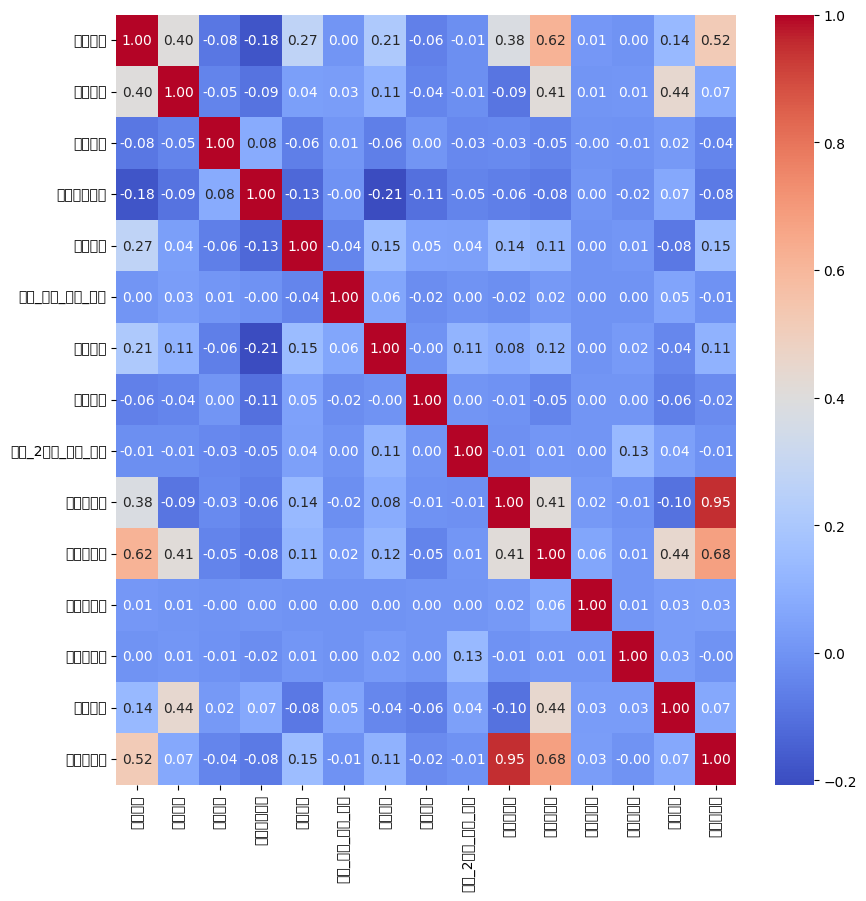

In [121]:
import seaborn as sns

x = LabelEncoder()
for i in ['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']:
    train[i] = x.fit_transform(train[i])
train['총상환금액'] = train['총상환원금'] + train['총상환이자']
print(train.corr(numeric_only=True).columns)
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
'''        self.dataset['근로기간'].replace('< 1 year', '1- year', inplace = True)
        self.dataset['근로기간'].replace('<1 year', '1- year', inplace = True)
        self.dataset['근로기간'].replace('1 year', '1 years', inplace = True)
        self.dataset['근로기간'].replace('3', '3 years', inplace = True)
        self.dataset['근로기간'].replace('10+years', '10+ years', inplace = True)'''

## 중요 특성 : 총상환금액, 총상환이자, 0_ 36 months

In [177]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [27]:
train['대출금액-bin'] = pd.cut(train['대출금액'], bins = [0, 1.02*10**7, 1.68*10**7, 2.4*10**7, 4.2*10**7], labels = [1, 2, 3, 4])

In [14]:
train['연간소득-bin'].fillna(1, inplace = True)

In [18]:
'''대출기간별_소득분위'''
mapping_1 = {}
idx = 0
for i in train['대출기간'].unique():
    for j in train['연간소득-bin'].unique():
        mapping_1[(i, j)] = idx
        idx = idx + 1

In [20]:
'''대출기간별_대출금액분위'''
mapping_2 = {}
idx = 0
for i in train['대출기간'].unique():
    for j in train['대출금액-bin'].unique():
        mapping_2[(i, j)] = idx
        idx = idx + 1

In [21]:
mapping_2

{(' 36 months', 2): 0,
 (' 36 months', 3): 1,
 (' 36 months', 1): 2,
 (' 36 months', 4): 3,
 (' 60 months', 2): 4,
 (' 60 months', 3): 5,
 (' 60 months', 1): 6,
 (' 60 months', 4): 7}

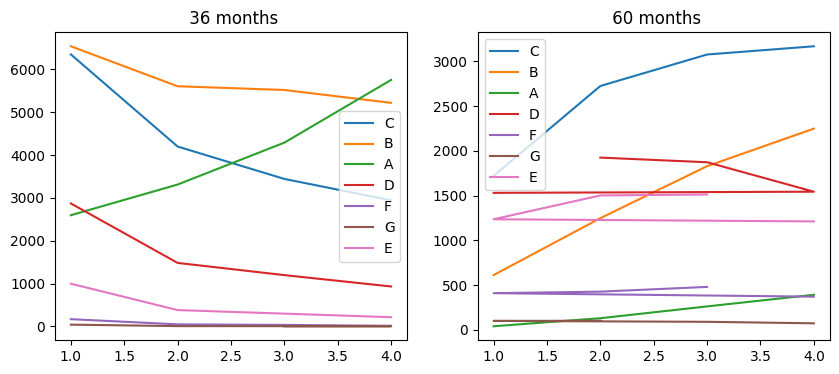

In [15]:
plt.figure(figsize = (10, 4))

for idx, i in enumerate(train['대출기간'].unique()):
    for j in train['대출등급'].unique():
        plt.subplot(1, 2, idx + 1)

        mask = train[train['대출기간'] == i]
        plt.plot(mask[mask['대출등급'] == j]['연간소득-bin'].value_counts(), label = j)
        plt.legend()
        plt.title(i)

plt.show()

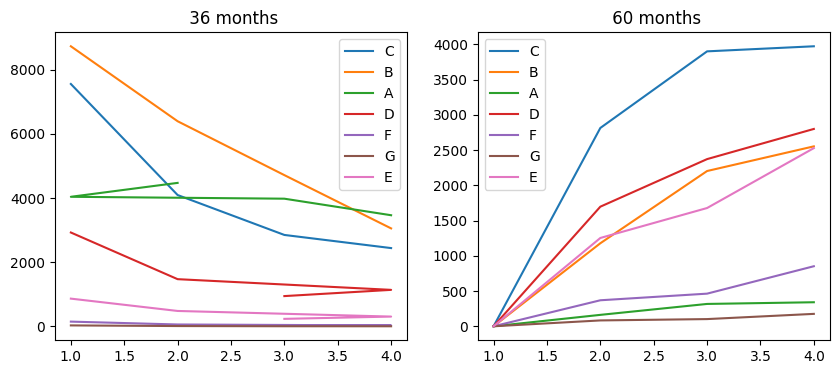

In [7]:
plt.figure(figsize = (10, 4))

for idx, i in enumerate(train['대출기간'].unique()):
    for j in train['대출등급'].unique():
        plt.subplot(1, 2, idx + 1)

        mask = train[train['대출기간'] == i]
        plt.plot(mask[mask['대출등급'] == j]['대출금액-bin'].value_counts(), label = j)
        plt.legend()
        plt.title(i)

plt.show()

In [168]:
x = {' 36 months' : 36, ' 60 months' : 60}
y = train['대출기간'].map(x)
train['1개월당_상환금액'] = (train['총상환원금'] + train['총상환이자']) / y

train['1개월당_상환금액']

0            0.000000
1        10127.200000
2        30016.333333
3        13303.666667
4         6291.600000
             ...     
96289    40743.000000
96290    23980.200000
96291    48065.666667
96292    61012.333333
96293    24197.333333
Name: 1개월당_상환금액, Length: 96294, dtype: float64

In [195]:
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환금액_비율
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,38.546786
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,12.922067
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,44.195639
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,78.760830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,14.775596
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,49.338048
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,9.670089
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,11.317732


In [224]:
train['상환금액_비율'] = train['총상환원금'] / train['대출금액']
train['상환금액_비율'].describe()

count    96294.000000
mean         0.047841
std          0.047854
min          0.000000
25%          0.023493
50%          0.043673
75%          0.069640
max          1.000000
Name: 상환금액_비율, dtype: float64

In [226]:
train['상환금액_비율_4분위'] = pd.cut(train['상환금액_비율'], bins = [0, 0.023493, 0.043673, 0.069640, np.inf], labels = [1, 2, 3, 4])

In [234]:
train['상환금액_비율_4분위'].fillna(1, inplace = True)

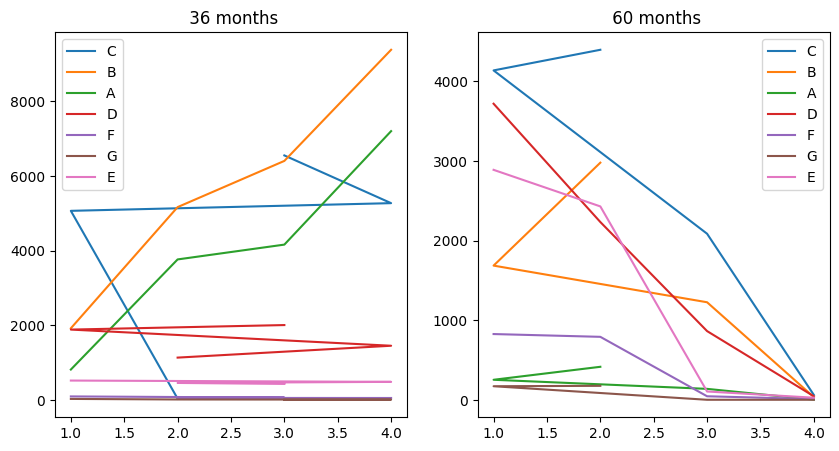

In [237]:
plt.figure(figsize = (10, 5))

for idx, i in enumerate(train['대출기간'].unique()):
    for j in train['대출등급'].unique():
        mask = train[train['대출기간'] == i]
        plt.subplot(1, 2, idx + 1)
        plt.plot(mask[mask['대출등급'] == j]['상환금액_비율_4분위'].value_counts(), label = j)
        plt.title(i)
        plt.legend()

plt.show()

In [169]:
train['1개월당_대출금액'] = train['대출금액'] / y
train['1개월당_대출금액']

0        346666.666667
1        240000.000000
2        333333.333333
3        400000.000000
4        300000.000000
             ...      
96289    400000.000000
96290    480000.000000
96291    400000.000000
96292    433333.333333
96293    240000.000000
Name: 1개월당_대출금액, Length: 96294, dtype: float64

# 검증

In [286]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [287]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

class Pipeline:
    def __init__(self):
        self.num_scaler = []
        self.num_transformer = {}
        self.cat_encoder = []
        self.is_train = True
        self.period_mapping = {' 36 months' : 36, ' 60 months' : 60}
        self.period_loan_mapping = {}
        self.period_income_mapping = {}
        self.period_debt_mapping = {}
        self.ID = None
    
    def check_train(self):
        if '대출등급' in self.dataset:
            self.is_train = True
        else:
            self.is_train = False

    def label_encoding(self):
        if self.is_train == True:
            encoder = LabelEncoder()
            self.dataset['대출등급'] = encoder.fit_transform(self.dataset['대출등급'])

            return encoder
        
    def save_ID(self):
        self.ID = self.dataset['ID']

    def preprocessing(self, dataset):
        self.dataset = dataset
        self.check_train() # self.is_train 값 변경

        self.dataset['대출금액-bin'] = pd.cut(self.dataset['대출금액'], bins = [0, 1.02*10**7, 1.68*10**7, 2.4*10**7, 4.2*10**7], labels = ['대출_1', '대출_2', '대출_3', '대출_4'])
        self.dataset['연간소득-bin'] = pd.cut(self.dataset['연간소득'], bins = [0, 5.76*10**7, 7.8*10**7, 1.128*10**8, 1.08*10**10], labels = ['소득_1', '소득_2', '소득_3', '소득_4'])
        self.dataset['연간소득-bin'].fillna('소득_1', inplace = True)
        self.dataset['상환금액_비율'] = self.dataset['총상환원금'] / self.dataset['대출금액']
        self.dataset['상환금액-bin'] = pd.cut(self.dataset['상환금액_비율'], bins = [0, 0.023493, 0.043673, 0.069640, np.inf], labels = ['상환_1', '상환_2', '상환_3', '상환_4'])
        self.dataset['상환금액-bin'].fillna('상환_1', inplace = True)

        if self.is_train == True:
            for i in self.dataset['대출기간'].unique():
                for j in self.dataset['대출금액-bin'].unique():
                    self.period_loan_mapping[(i, j)] = f'{i}_{j}'

            for i in self.dataset['대출기간'].unique():    
                for j in self.dataset['연간소득-bin'].unique():
                    self.period_income_mapping[(i, j)] = f'{i}_{j}'
            
            for i in self.dataset['대출기간'].unique():    
                for j in self.dataset['상환금액-bin'].unique():
                    self.period_debt_mapping[(i, j)] = f'{i}_{j}'
        else:
            self.save_ID()

        self.dataset.drop('ID', axis = 1, inplace = True)

        self.dataset['기간별_대출4분위'] = self.dataset.apply(lambda row: self.period_loan_mapping.get((row['대출기간'], row['대출금액-bin']), None), axis = 1)
        self.dataset['기간별_소득4분위'] = self.dataset.apply(lambda row: self.period_income_mapping.get((row['대출기간'], row['연간소득-bin']), None), axis = 1)
        self.dataset['기간별_상환4분위'] = self.dataset.apply(lambda row: self.period_debt_mapping.get((row['대출기간'], row['상환금액-bin']), None), axis = 1)
        self.dataset.drop('대출금액-bin', axis = 1, inplace = True)
        self.dataset.drop('연간소득-bin', axis = 1, inplace = True)
        self.dataset.drop('상환금액-bin', axis = 1, inplace = True)

        self.dataset['총상환금액'] = self.dataset['총상환원금'] + self.dataset['총상환이자']
        self.dataset['1개월당_대출금액'] = self.dataset['대출금액'] / self.dataset['대출기간'].map(self.period_mapping)
        self.dataset['1개월당_상환금액'] = self.dataset['총상환금액'] / self.dataset['대출기간'].map(self.period_mapping)
        
        num_columns_1 = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '총상환금액', '1개월당_대출금액', '1개월당_상환금액'] # StandardScaler
        num_columns_2 = ['연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '1개월당_상환금액', '상환금액_비율'] # BOXCOX
        cat_columns = ['대출기간', '근로기간', '주택소유상태', '대출목적', '기간별_대출4분위', '기간별_소득4분위', '기간별_상환4분위']

        self.dataset['근로기간'].replace('< 1 year', '1- year', inplace = True)
        self.dataset['근로기간'].replace('<1 year', '1- year', inplace = True)
        self.dataset['근로기간'].replace('1 year', '1 years', inplace = True)
        self.dataset['근로기간'].replace('3', '3 years', inplace = True)
        self.dataset['근로기간'].replace('10+years', '10+ years', inplace = True)

        # 훈련셋 전처리
        if self.is_train == True:
            # 이상치 Drop
            self.dataset.drop(self.dataset['부채_대비_소득_비율'].argmax(), axis = 0, inplace = True)
            self.dataset.drop(self.dataset['최근_2년간_연체_횟수'].argmax(), axis = 0, inplace = True)
            self.dataset.drop(self.dataset[self.dataset['주택소유상태'] == 'ANY'].index, inplace = True)

            self.dataset.reset_index(drop = True, inplace = True)

            # 수치형 전처리
            for i in num_columns_1:
                if i in num_columns_2:
                    transformer = PowerTransformer()
                    self.dataset[i] = transformer.fit_transform(np.array(self.dataset[i]).reshape(-1, 1))
                    self.num_transformer[i] = transformer
                    
                if i == '부채_대비_소득_비율':
                    self.dataset[i] = np.sqrt(self.dataset[i] + 1)

                scaler = StandardScaler()
                self.dataset[i] = scaler.fit_transform(np.array(self.dataset[i]).reshape(-1, 1))
                self.num_scaler.append(scaler)

            # 범주형 전처리
            for i in cat_columns:
                encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
                encoded = encoder.fit_transform(np.array(self.dataset[i]).reshape(-1, 1))
                encoded_df = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
                self.dataset.drop(i, axis = 1, inplace = True)
                self.dataset = pd.concat([self.dataset, encoded_df], axis = 1)
                self.cat_encoder.append(encoder)

        # 테스트셋 전처리
        else:
            # 수치형 전처리
            for idx, i in enumerate(num_columns_1):
                if i in num_columns_2:
                    self.dataset[i] = self.num_transformer[i].transform(np.array(self.dataset[i]).reshape(-1, 1))

                if i == '부채_대비_소득_비율':
                    self.dataset[i] = np.sqrt(self.dataset[i] + 1)

                self.dataset[i] = self.num_scaler[idx].transform(np.array(self.dataset[i]).reshape(-1, 1))
            
            # 범주형 전처리
            for idx, i in enumerate(cat_columns):
                encoded = self.cat_encoder[idx].transform(np.array(self.dataset[i]).reshape(-1, 1))
                encoded_df = pd.DataFrame(encoded, columns = self.cat_encoder[idx].get_feature_names_out())
                self.dataset.drop(i, axis = 1, inplace = True)
                self.dataset = pd.concat([self.dataset, encoded_df], axis = 1)

        return self.dataset

In [288]:
from sklearn.model_selection import train_test_split

pipeline = Pipeline()
pre_train = pipeline.preprocessing(train)
label_encoder = pipeline.label_encoding()
X_test = pipeline.preprocessing(test)

target = pre_train['대출등급']

X_train, X_val, y_train, y_val = train_test_split(pre_train.drop('대출등급', axis = 1), target, test_size = 0.07, random_state = 42, stratify = pre_train['대출등급'])

In [289]:
pipeline.period_debt_mapping

{(' 36 months', '상환_1'): ' 36 months_상환_1',
 (' 36 months', '상환_2'): ' 36 months_상환_2',
 (' 36 months', '상환_4'): ' 36 months_상환_4',
 (' 36 months', '상환_3'): ' 36 months_상환_3',
 (' 60 months', '상환_1'): ' 60 months_상환_1',
 (' 60 months', '상환_2'): ' 60 months_상환_2',
 (' 60 months', '상환_4'): ' 60 months_상환_4',
 (' 60 months', '상환_3'): ' 60 months_상환_3'}

In [290]:
X_train.columns

Index(['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자',
       '총연체금액', '연체계좌수', '상환금액_비율', '총상환금액', '1개월당_대출금액', '1개월당_상환금액',
       'x0_ 36 months', 'x0_ 60 months', 'x0_1 years', 'x0_1- year',
       'x0_10+ years', 'x0_2 years', 'x0_3 years', 'x0_4 years', 'x0_5 years',
       'x0_6 years', 'x0_7 years', 'x0_8 years', 'x0_9 years', 'x0_Unknown',
       'x0_MORTGAGE', 'x0_OWN', 'x0_RENT', 'x0_기타', 'x0_부채 통합', 'x0_소규모 사업',
       'x0_신용 카드', 'x0_의료', 'x0_이사', 'x0_자동차', 'x0_재생 에너지', 'x0_주요 구매',
       'x0_주택', 'x0_주택 개선', 'x0_휴가', 'x0_ 36 months_대출_1',
       'x0_ 36 months_대출_2', 'x0_ 36 months_대출_3', 'x0_ 36 months_대출_4',
       'x0_ 60 months_대출_2', 'x0_ 60 months_대출_3', 'x0_ 60 months_대출_4',
       'x0_ 36 months_소득_1', 'x0_ 36 months_소득_2', 'x0_ 36 months_소득_3',
       'x0_ 36 months_소득_4', 'x0_ 60 months_소득_1', 'x0_ 60 months_소득_2',
       'x0_ 60 months_소득_3', 'x0_ 60 months_소득_4', 'x0_ 36 months_상환_1',
       'x0_ 36 months_상환_2', 'x0_ 36 months_상환_3', 

In [293]:
import lightgbm as lgb

model = lgb.LGBMClassifier(
    n_estimators = 3000,
    learning_rate = 0.0065,
    colsample_bytree = 0.51,
    colsample_bynode = 0.83,
    lambda_l1 = 0.7564,
    lambda_l2 = 0.0648,
    max_depth = 50,
    num_leaves = 492,
    min_data_in_leaf = 20,
    objective = "multiclass"
)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average = 'micro')

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.7564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7564
[LightGBM] [Warning] lambda_l2 is set=0.0648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0648
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.7564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7564
[LightGBM] [Warning] lambda_l2 is set=0.0648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

0.9332443257676902

In [331]:
import xgboost as xgb
from sklearn.metrics import f1_score

model = xgb.XGBClassifier(
    n_estimators = 3000,
    learning_rate = 0.03,
    max_depth = 15,
    max_leaves = 55,
    gamma = 0.4,
    reg_alpha = 0.4,
    reg_lambda = 1.0,
    subsample = 0.8,
    random_state = 42,
    tree_method = 'hist',
    device = 'cuda'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
f1_score(y_val, y_pred, average = 'micro')

0.9310191366266133

In [292]:
print(model.feature_importances_)
model.feature_names_in_

[0.00552073 0.00325411 0.00262404 0.0025065  0.00270651 0.01169169
 0.01909135 0.0021811  0.00204543 0.13127059 0.01037679 0.00366828
 0.00553936 0.17337698 0.         0.00213163 0.00229258 0.00224319
 0.00239214 0.00227313 0.00216629 0.00208023 0.00205774 0.00204874
 0.00218699 0.00210702 0.00224602 0.00265829 0.00222088 0.00268786
 0.0028662  0.00238571 0.00336084 0.00589882 0.00203142 0.00213216
 0.00228432 0.         0.0024739  0.00248523 0.00228    0.00206463
 0.00282352 0.00288301 0.0023306  0.0142093  0.00851092 0.00295667
 0.00431216 0.00283554 0.0021913  0.00223215 0.00461189 0.00352956
 0.00234067 0.00215931 0.00294531 0.00815194 0.26181442 0.10864333
 0.00395121 0.00423674 0.09963778 0.00967098 0.00311219]


array(['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금',
       '총상환이자', '총연체금액', '연체계좌수', '상환금액_비율', '총상환금액', '1개월당_대출금액',
       '1개월당_상환금액', 'x0_ 36 months', 'x0_ 60 months', 'x0_1 years',
       'x0_1- year', 'x0_10+ years', 'x0_2 years', 'x0_3 years',
       'x0_4 years', 'x0_5 years', 'x0_6 years', 'x0_7 years',
       'x0_8 years', 'x0_9 years', 'x0_Unknown', 'x0_MORTGAGE', 'x0_OWN',
       'x0_RENT', 'x0_기타', 'x0_부채 통합', 'x0_소규모 사업', 'x0_신용 카드', 'x0_의료',
       'x0_이사', 'x0_자동차', 'x0_재생 에너지', 'x0_주요 구매', 'x0_주택', 'x0_주택 개선',
       'x0_휴가', 'x0_ 36 months_대출_1', 'x0_ 36 months_대출_2',
       'x0_ 36 months_대출_3', 'x0_ 36 months_대출_4', 'x0_ 60 months_대출_2',
       'x0_ 60 months_대출_3', 'x0_ 60 months_대출_4', 'x0_ 36 months_소득_1',
       'x0_ 36 months_소득_2', 'x0_ 36 months_소득_3', 'x0_ 36 months_소득_4',
       'x0_ 60 months_소득_1', 'x0_ 60 months_소득_2', 'x0_ 60 months_소득_3',
       'x0_ 60 months_소득_4', 'x0_ 36 months_상환_1', 'x0_ 36 months_상환_2',
       'x0_ 36 months_

In [302]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1174
           1       0.93      0.95      0.94      2017
           2       0.93      0.94      0.94      1934
           3       0.94      0.91      0.92       935
           4       0.90      0.90      0.90       515
           5       0.89      0.72      0.79       137
           6       0.86      0.66      0.75        29

    accuracy                           0.93      6741
   macro avg       0.91      0.86      0.88      6741
weighted avg       0.93      0.93      0.93      6741



기존 점수 - 0.8565494733719032

총 상환금액 추가 - 0.8578845868565494

총 상환금액 + 1개월당 상환금액 추가 - 0.8598130841121495

총 상환금액 + 1개월당 상환금액 + 1개월당 대출금액 추가 - 0.8615932354250111 >>> 하이퍼파라미터 조정 0.8620382732532266

+ 소득분위, 대출분위 추가 - 0.8630766948523958

+ 상환금액 비율 추가 - 0.9304257528556594

+ 상환금액 범주형 추가 - 0.9307224447411363 >>> 최종 제출 0.88292

하이퍼파라미터 조정 - 0.9310191366266133 >>> 최종 동일..

# 하이퍼파라미터 조정

In [ ]:
'''import xgboost as xgb

params = {
    'n_estimators' : 2500,
    'learning_rate' : 0.16,
    'max_depth' : 13,
    'max_leaves' : 75,
    'gamma' : 0.7,
    'reg_alpha' : 0.5,
    'reg_lambda' : 0.5,
    'subsample' : 0.8,
    'colsample_bytree' : 0.8,
    'colsample_bylevel' : 0.85,
    'colsample_bynode' : 0.75,
    'tree_method' : 'hist',
    'device' : 'cuda',
    'random_state' : 42
}

model = xgb.XGBClassifier(**params)'''

"import xgboost as xgb\n\nparams = {\n    'n_estimators' : 2500,\n    'learning_rate' : 0.16,\n    'max_depth' : 13,\n    'max_leaves' : 75,\n    'gamma' : 0.7,\n    'reg_alpha' : 0.5,\n    'reg_lambda' : 0.5,\n    'subsample' : 0.8,\n    'colsample_bytree' : 0.8,\n    'colsample_bylevel' : 0.85,\n    'colsample_bynode' : 0.75,\n    'tree_method' : 'hist',\n    'device' : 'cuda',\n    'random_state' : 42\n}\n\nmodel = xgb.XGBClassifier(**params)"